# Лабораторная работа №1

In [116]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import integrate

In [117]:
def cyclic_freq(T: float):
    return 2 * np.pi / T

In [118]:
def period(f: float):
    return 1 / f

In [119]:
def an(func, n: int, T: float, A: float):

    w = cyclic_freq(T)
    return 2 / T * integrate.quad(lambda z: func(z, A, w) * np.cos(n * w * z), 0, T)[0]

In [120]:
def bn(func, n: int, T: float, A: float):

    w = cyclic_freq(T)
    return 2 / T * integrate.quad(lambda z: func(z, A, w) * np.sin(n * w * z), 0, T)[0]

## Задание 1

In [121]:
SAMPLE_RATE = 1000
T0 = -4
T1 = 4
T  = 1
A  = 2
N  = 10

In [122]:
def rect_func(x: float, A: float, w: float):
    return A * np.sign(np.sin(w * x))

In [123]:
def func_x(func, A: float, T: float, start_point: float, end_point: float, sample_rate: int):

    x = np.linspace(start_point, end_point, num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda z: func(z, A, cyclic_freq(T)), 0, x)

    return x, y

In [124]:
def approx_func_x(func, N: int, A: int, T: float, x: np.ndarray):
    
    w  = cyclic_freq(T)
    a0 = 1 / T * integrate.quad(func, 0, T, args = (A, w))[0]


    def get_y(t: float):

        a = lambda n: an(func, n, T, A)
        b = lambda n: bn(func, n, T, A)

        return a0 + np.sum([a(n) * np.cos(n * w * t) + b(n) * np.sin(n * w * t) \
                            for n in range(1, N + 1)], axis = 0)


    return np.apply_along_axis(get_y, 0, x)


In [125]:
def error_func(true_vals: np.ndarray, approx_vals: np.ndarray):
    return true_vals - approx_vals

In [126]:
x, y0 = func_x(rect_func, A, T, T0, T1, SAMPLE_RATE)
y1 = approx_func_x(rect_func, N, A, T, x)
y2 = error_func(y0, y1)

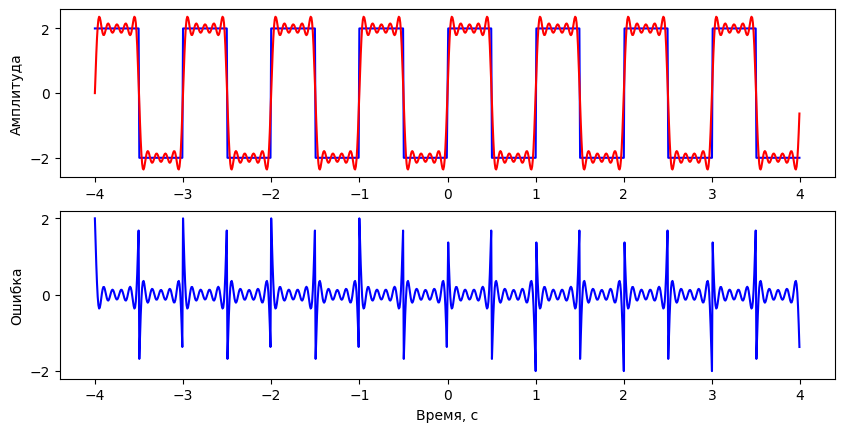

In [127]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(10)

axs[0].plot(x, y0, 'b')
axs[0].plot(x, y1, 'r')
axs[1].plot(x, y2, 'b')

axs[0].set_ylabel('Амплитуда')
axs[1].set_ylabel('Ошибка')
axs[1].set_xlabel('Время, с')

axs[0].set_yticks([-A, 0, A])
axs[1].set_yticks([-A, 0, A])

plt.show()

## Задание 2

In [128]:
def cos_func(x: float, A: float, w: float):
    return A * np.cos(w * x)

In [129]:
def find_freq(y: np.ndarray):

    n = len(y)

    xfft = np.arange(n)
    yfft = np.fft.fft(y) / n

    return xfft[range(n // 4)], yfft[range(n // 4)]    

In [130]:
F = 100
T = period(F)
w = cyclic_freq(T)

In [131]:
x, y0 = func_x(cos_func, A, T, 0, 1, SAMPLE_RATE)
y1 = approx_func_x(cos_func, N, A, T, x)

xfft0, yfft0 = find_freq(y0)
xfft1, yfft1 = find_freq(y1)

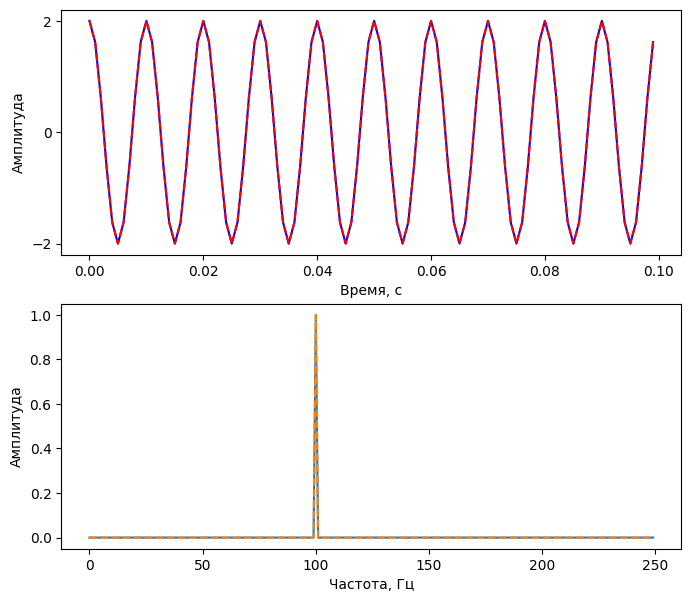

In [132]:
fig, axs = plt.subplots(2, 1)

fig.set_figwidth(8)
fig.set_figheight(7)

axs[0].plot(x[:100], y0[:100], 'b')
axs[0].plot(x[:100], y1[:100], 'r--')

axs[1].plot(xfft0, np.abs(yfft0))
axs[1].plot(xfft1, np.abs(yfft1), '--')

axs[0].set_ylabel('Амплитуда')
axs[0].set_xlabel('Время, с')

axs[1].set_ylabel('Амплитуда')
axs[1].set_xlabel('Частота, Гц')

axs[0].set_yticks([-A, 0, A])

## Задание 3

In [133]:
T  = 0.2
T0 = 0
T1 = 1
N  = 25

In [134]:
x, y0 = func_x(rect_func, A, T, T0, T1, SAMPLE_RATE)
y1 = approx_func_x(rect_func, N, A, T, x)

xfft0, yfft0 = find_freq(y0)
xfft1, yfft1 = find_freq(y1)

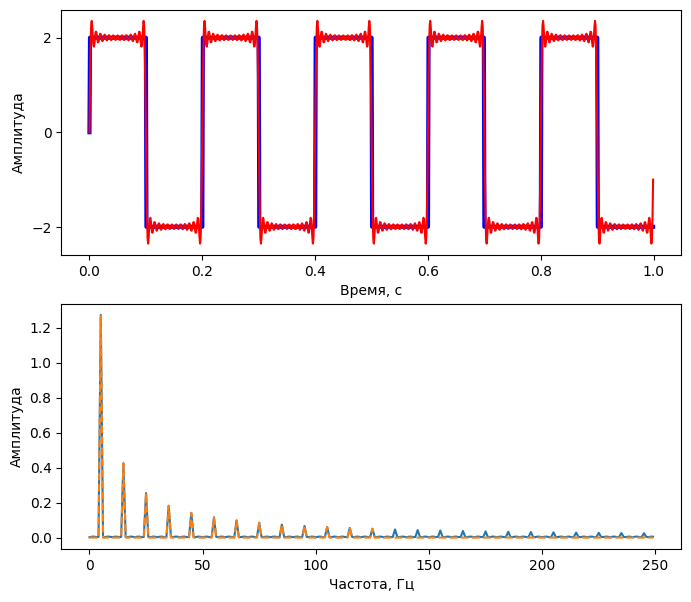

In [135]:
fig, axs = plt.subplots(2, 1)

fig.set_figwidth(8)
fig.set_figheight(7)

axs[0].plot(x, y0, 'b', linewidth = 3)
axs[0].plot(x, y1, 'r')

axs[1].plot(xfft0, np.abs(yfft0))
axs[1].plot(xfft1, np.abs(yfft1), '--')

axs[0].set_ylabel('Амплитуда')
axs[0].set_xlabel('Время, с')

axs[1].set_ylabel('Амплитуда')
axs[1].set_xlabel('Частота, Гц')

axs[0].set_yticks([-A, 0, A])

plt.show()

## Задание 4

In [136]:
T  = 0.2
T0 = 0
T1 = 1
N  = 25

In [137]:
x, y0 = func_x(rect_func, A, T, T0, T1, SAMPLE_RATE)
y1 = y0 + np.random.normal(0, 1, len(y0))

xfft0, yfft0 = find_freq(y0)
xfft1, yfft1 = find_freq(y1)

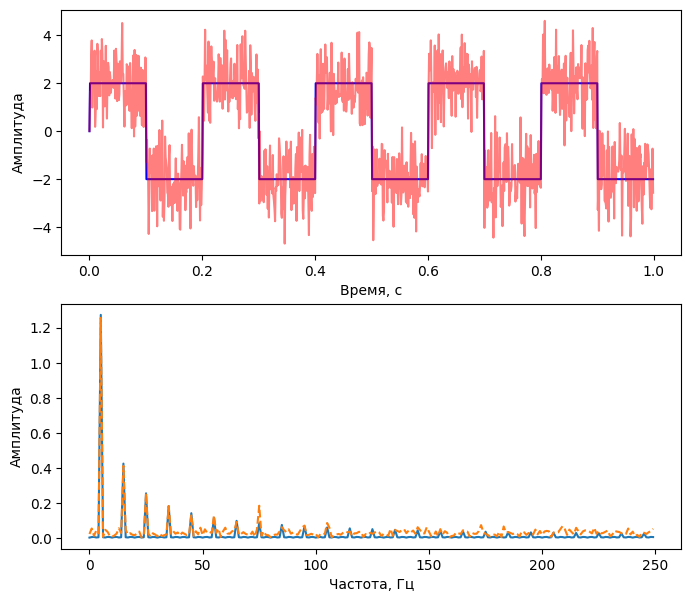

In [138]:
fig, axs = plt.subplots(2, 1)

fig.set_figwidth(8)
fig.set_figheight(7)

axs[0].plot(x, y0, 'b')
axs[0].plot(x, y1, 'r', alpha = 0.5)

axs[1].plot(xfft0, np.abs(yfft0))
axs[1].plot(xfft1, np.abs(yfft1), '--')

axs[0].set_ylabel('Амплитуда')
axs[0].set_xlabel('Время, с')

axs[1].set_ylabel('Амплитуда')
axs[1].set_xlabel('Частота, Гц')

plt.show()